In [1]:
import insigen 
import scraper
ins = insigen.insigen()

c:\Users\arcan\Desktop\CodeStuff\PersonalProjects\TopicModelling\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
article = scraper.getArticle('/wiki/Nikola_Tesla')
freq = ins.get_keyword_frequency(article, min_len=2, max_len=3, contextual_threshold=0.3)
freq

{'teslas induction motor': (4, 0.55804604),
 'edison machine works': (3, 0.4896404),
 'the edison machine': (4, 0.5638132),
 'millions of volts': (3, 0.34729645),
 'the nikola tesla': (4, 0.7189371),
 'electric power': (3, 0.49789998),
 'teslas patents': (4, 0.5850013),
 'teslas father': (3, 0.60025525),
 'thomas edison': (4, 0.6080771),
 'a nobel prize': (3, 0.31291357),
 'polyphase ac': (3, 0.3024898),
 'his patents': (4, 0.45684338),
 'that teslas': (3, 0.3719812),
 'electricity': (10, 0.46127468),
 'highvoltage': (5, 0.32073924),
 'transformer': (4, 0.35805368),
 'year tesla': (3, 0.48885638),
 'tesla coil': (3, 0.57752323),
 '1906 tesla': (3, 0.6242574),
 'inventions': (10, 0.41889003),
 'the tesla': (13, 0.59927934),
 'and tesla': (5, 0.41240087),
 'his tesla': (3, 0.5950781),
 'generator': (3, 0.33213198),
 'inventor': (5, 0.49433386),
 'voltages': (3, 0.32327792),
 'coils': (3, 0.3169681)}

In [11]:
key_freq = {key: val[0] for key, val in freq.items()}

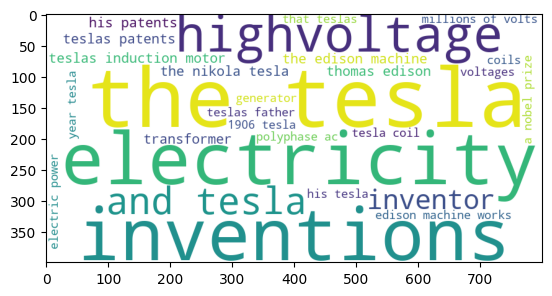

In [12]:
import matplotlib.pyplot as plt
cloud = ins.generate_wordcloud(key_freq)
plt.imshow(cloud)
plt.show()

In [13]:
from keybert import KeyBERT
kw_model = KeyBERT(model = 'all-mpnet-base-v2')
kb_words = kw_model.extract_keywords(article, keyphrase_ngram_range=(2, 3))
norm_keywords = kw_model.extract_keywords(article)
kb_words + norm_keywords

[('invented envisioned tesla', 0.7344),
 ('inventions nikola tesla', 0.734),
 ('1890s tesla working', 0.725),
 ('tesla developed induction', 0.7214),
 ('inventions developed tesla', 0.7186),
 ('tesla', 0.5606),
 ('têsla', 0.5606),
 ('inventor', 0.4943),
 ('edison', 0.4878),
 ('electrical', 0.4817)]

In [14]:
avg_sim = [article.count(val[0])*val[1] for val in kb_words + norm_keywords]
normalized_scores = [((val - min(avg_sim))/(max(avg_sim) - min(avg_sim))) for val in avg_sim]
normalized_scores

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0775863262057989,
 0.0775863262057989,
 0.4788734343644038,
 0.0,
 1.0]

In [15]:
sum(normalized_scores)/len(normalized_scores)

0.16340460867760015

In [16]:
import numpy as np
freqs = {key: val[0]*val[1] for key, val in freq.items()}
freq_scores = list(freqs.values())
normalized_scores = [(val - min(freq_scores))/(max(freq_scores) - min(freq_scores)) for val in freq_scores]
normalized_scores

[0.19245730207787176,
 0.08156888840713283,
 0.19580876556020302,
 0.019528811830433673,
 0.28595564104777266,
 0.08516878820822227,
 0.20812175773966984,
 0.12977994363064402,
 0.22153176822219392,
 0.0045431646034683965,
 0.0,
 0.13364557274369682,
 0.03028756918469144,
 0.5383103598256663,
 0.10114927180543504,
 0.07623609126916217,
 0.08122716777725655,
 0.11987227951157642,
 0.14024118270045158,
 0.4767330591610227,
 1.0,
 0.16773322739318366,
 0.1275235067696288,
 0.012919437620950016,
 0.22725019824269158,
 0.00906042868481526,
 0.006310323196041299]

In [17]:
sum(normalized_scores)/len(normalized_scores)

0.1730727595264401